# This Jupyter notebook will:
### a) Read in the data file Data/1hz3_T310.run.25000000.energy.xvg
### b) Make 6 separate plots for each quantity vs time, with time in ns
### c) Make a plot that has kinetic energy and temperature on the same plot, where the left axis is temperature and the right axis is kinetic ene

In [9]:
import numpy as np
import matplotlib.pyplot as mplt
import pandas as pan
import seaborn as sbn

In [14]:
cd Data

/scratch/work/courses/CHEM-GA-2671-2023fa/students/hv454/myproject/comp-lab-class-2023/Week2/Data


In [15]:
ls

1UBQ.pdb
1UBQ_processed.pdb
1hz3_T310.run.25000000.edr
1hz3_T310.run.25000000.energy.out
1hz3_T310.run.25000000.energy.xvg
1hz3_T310.start.nowater.gro
1hz3_T310.stepid25000000.every100ps.nowater.xtc
get_energy.sh


In [16]:
#The above steps provided the path to the data file, now we will read in the data:
data_np = np.loadtxt('../Data/1hz3_T310.run.25000000.energy.xvg', skiprows=29)

#Now, we will use Pandas to frame the data into a table
data = pan.DataFrame(data_np, columns=['Time', 'Potential Energy', 'Kinetic Energy', 'Total Energy', 'Temperature', 'Volume', 'Pressure'])

#Now, we we will present the data below:
data

,Time,Potential Energy,Kinetic Energy,Total Energy,Temperature,Volume,Pressure
0,0.0,-175680.937500,35128.644531,-140552.296875,309.853302,84.967438,137.956879
1,100.0,-175387.062500,35737.015625,-139650.046875,315.219452,116.084549,137.819077
2,200.0,-175059.531250,35401.789062,-139657.750000,312.262573,-85.727356,137.437531
3,300.0,-175760.984375,35717.289062,-140043.687500,315.045502,269.017548,135.811859
4,400.0,-174898.718750,35252.562500,-139646.156250,310.946320,-129.284088,137.846680
...,...,...,...,...,...,...,...
496,49600.0,-176148.750000,35003.425781,-141145.328125,308.748810,123.643768,136.727814
497,49700.0,-175596.437500,35622.363281,-139974.078125,314.208221,76.174149,137.710068
498,49800.0,-175233.296875,35012.890625,-140220.406250,308.832306,25.778091,138.378967
499,49900.0,-175552.906250,35534.488281,-140018.421875,313.433105,-133.103729,138.065186


Text(0, 0.5, 'Pressure (Pa)')

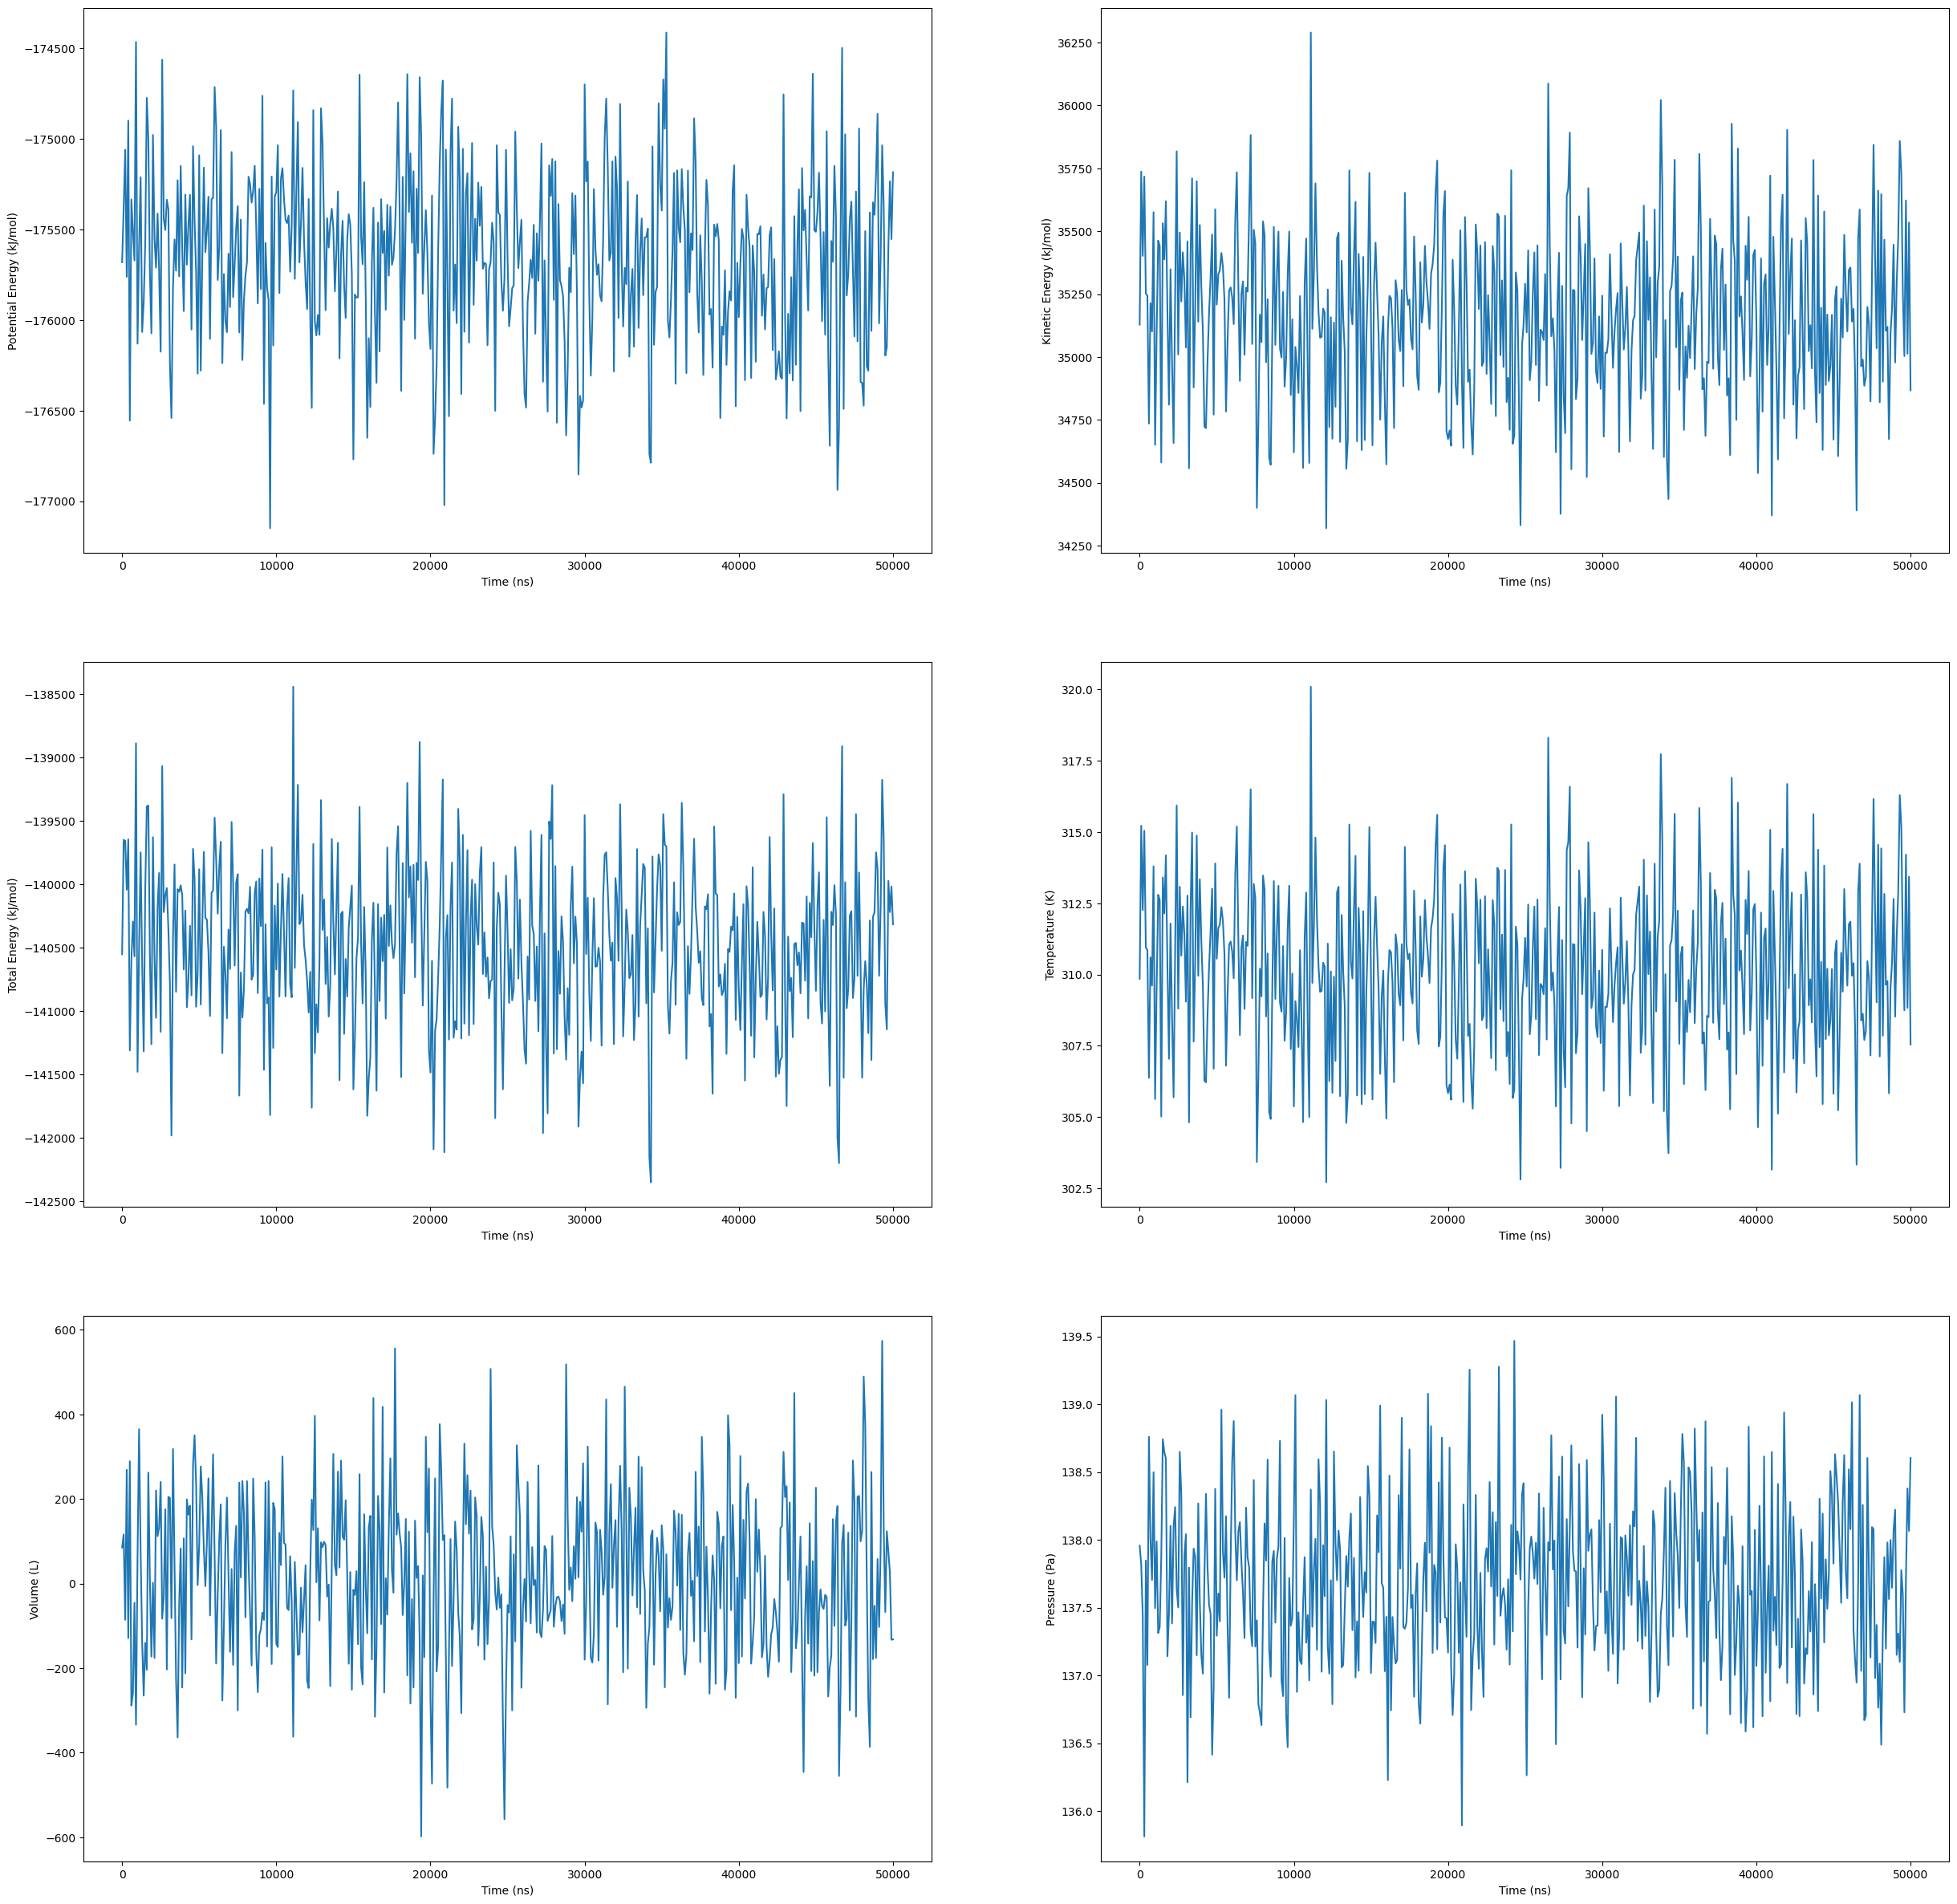

In [18]:
#The above table is able to provide a numerical representation of the data we are plotting
#Now, we will make 6 separate plots for each quantity vs time, with time in ns, using pyplot

fig, axes = mplt.subplots(3,2, figsize=(30,30))
sbn.lineplot(data=data, x='Time', y='Potential Energy', ax = axes [0,0])
sbn.lineplot(data=data, x='Time', y='Kinetic Energy', ax = axes [0,1])
sbn.lineplot(data=data, x='Time', y='Total Energy', ax = axes [1,0])
sbn.lineplot(data=data, x='Time', y='Temperature', ax = axes [1,1])
sbn.lineplot(data=data, x='Time', y='Volume', ax = axes [2,0])
sbn.lineplot(data=data, x='Time', y='Pressure', ax = axes [2,1])

#Now, let us label the above graphs with proper titles

axes[0,0].xaxis.set_label_text('Time (ns)')
axes[0,0].yaxis.set_label_text('Potential Energy (kJ/mol)')
axes[0,1].xaxis.set_label_text('Time (ns)')
axes[0,1].yaxis.set_label_text('Kinetic Energy (kJ/mol)')
axes[1,0].xaxis.set_label_text('Time (ns)')
axes[1,0].yaxis.set_label_text('Total Energy (kJ/mol)')
axes[1,1].xaxis.set_label_text('Time (ns)')
axes[1,1].yaxis.set_label_text('Temperature (K)')
axes[2,0].xaxis.set_label_text('Time (ns)')
axes[2,0].yaxis.set_label_text('Volume (L)')
axes[2,1].xaxis.set_label_text('Time (ns)')
axes[2,1].yaxis.set_label_text('Pressure (Pa)')

Text(0, 0.5, 'Kinetic Energy (kJ.mol)')

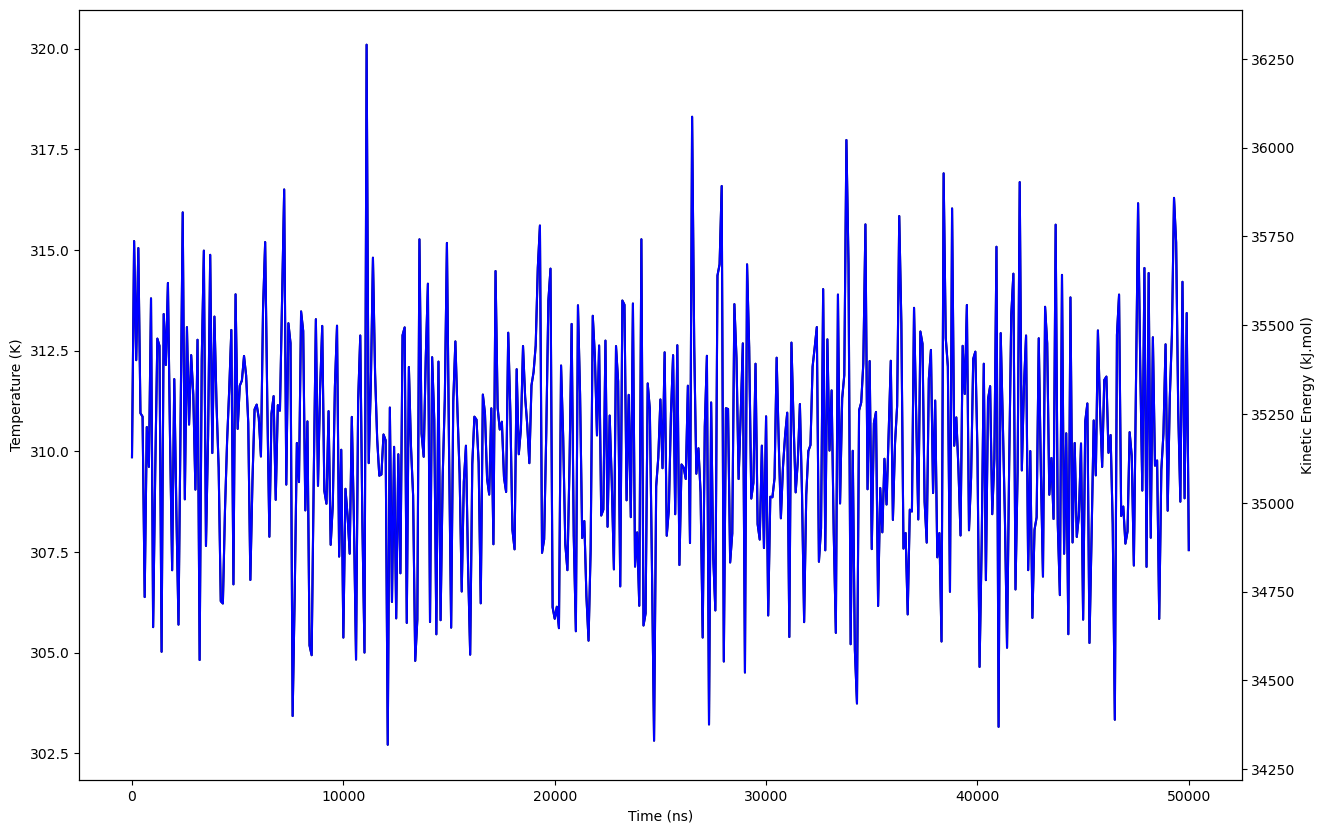

In [28]:
#The next step is to now make a plot that has kinetic energy and temperature on the same plot
#The left axis is temperature and the right axis is kinetic one

fig, axis1 = mplt.subplots(figsize=(15,10))
axis2 = axis1.twinx()

sbn.lineplot(data=data, x = 'Time', y = 'Temperature', ax = axis1, color = 'black')
sbn.lineplot(data=data, x = 'Time', y = 'Kinetic Energy', ax =axis2, color = 'blue')

axis1.xaxis.set_label_text('Time (ns)')
axis1.yaxis.set_label_text('Temperature (K)')
axis2.yaxis.set_label_text('Kinetic Energy (kJ.mol)')

In [ ]:
#The above graph shows temperature on the left and kinetic energy on the right, however there is significant overlap
#Since kinetic energy and temperature are correlated, the overlap is similar between the above tables